In [3]:
#Linear Regression


import numpy as np

X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)

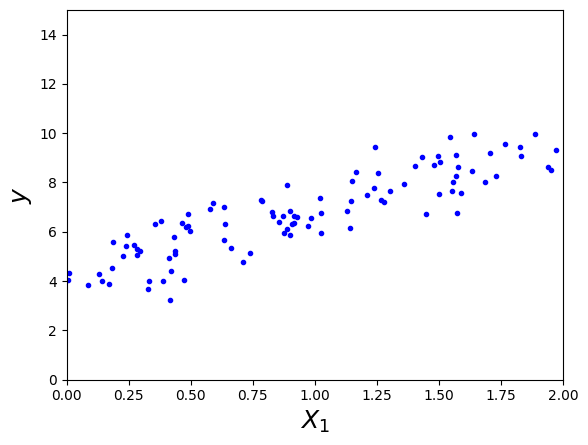

In [5]:
import matplotlib.pyplot as plt

plt.plot(X,y,"b.")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [7]:
#Linear Regression with normal equation 

X_b=np.c_[np.ones((100,1)),X]
theta_ne=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_ne



array([[4.22324172],
       [2.68941412]])

In [8]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_ne)
y_predict

array([[4.22324172],
       [9.60206995]])

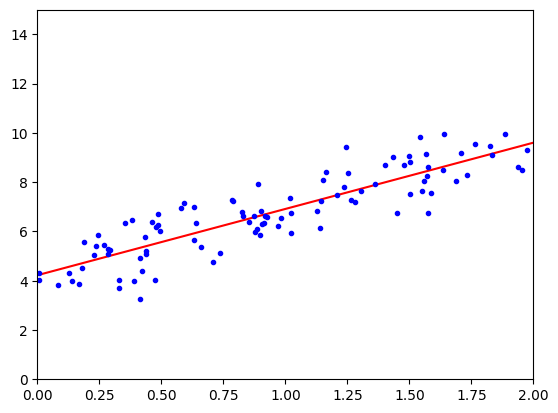

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [11]:
#Linear regression with sklearn

from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.22324172]), array([[2.68941412]]))

In [12]:
lin_reg.predict(X_new)

array([[4.22324172],
       [9.60206995]])

In [14]:
#Linear Reg with scipy least square

theta_svd, residuals, rank, s=np.linalg.lstsq(X_b,y, rcond=1e-6)
theta_svd, residuals, rank, s

(array([[4.22324172],
        [2.68941412]]),
 array([62.82813336]),
 np.int32(2),
 array([14.22008927,  3.80648394]))

In [15]:
#Linear Reg with pseudoinverse

np.linalg.pinv(X_b).dot(y)

array([[4.22324172],
       [2.68941412]])

In [17]:
#if there are many instances and many features, should use GD.

#finding coef by using GD equation

eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients=2/m* X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients

In [18]:
theta

array([[4.22324172],
       [2.68941412]])

In [30]:
#finding coef by using SGD (learning schedule)

n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients



In [31]:
theta

array([[4.18928378],
       [2.71223008]])

In [35]:
#Linear Reg with SGD in sklearn 

from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [36]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.20248497]), array([2.74516477]))

In [42]:
#Linear Reg with mini batch GD

n_iterations=50
minibatch_size=20

np.random.seed(42)
theta=np.random.randn(2,1)

t=0
for epoch in range(n_iterations):
    shuffled_indices=np.random.permutation(m)
    X_b_shuffled=X_b[shuffled_indices]
    y_shuffled=y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t+=1
        xi=X_b_shuffled[i:i+minibatch_size]
        yi=y_shuffled[i:i+minibatch_size]
        gradients=2/minibatch_size*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(t)
        theta=theta-eta*gradients
        
        

In [43]:
theta

array([[4.17062473],
       [2.73382979]])

In [44]:
#Polynomial Regression


m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

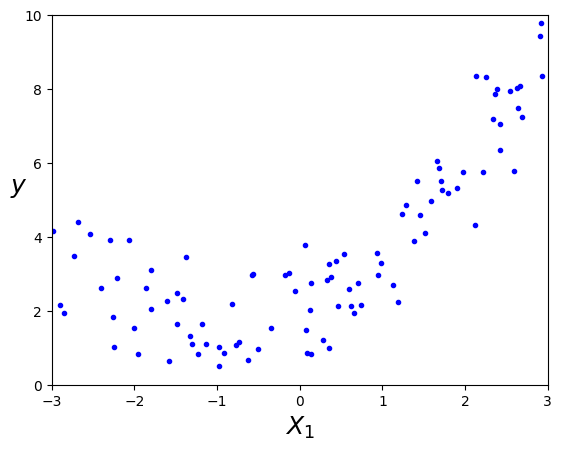

In [47]:
plt.plot(X,y,"b.")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.axis([-3,3,0,10])
plt.show()

In [49]:
#poly reg with sklearn (second degree)

#add power of each features then train linear model

from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
X_poly[0]


array([2.38942838, 5.709368  ])

In [50]:
X[0]

array([2.38942838])

In [51]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.9735233]), array([[0.95038538, 0.52577032]]))

In [52]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly_features.transform(X_new)
y_new=lin_reg.predict(X_new_poly)

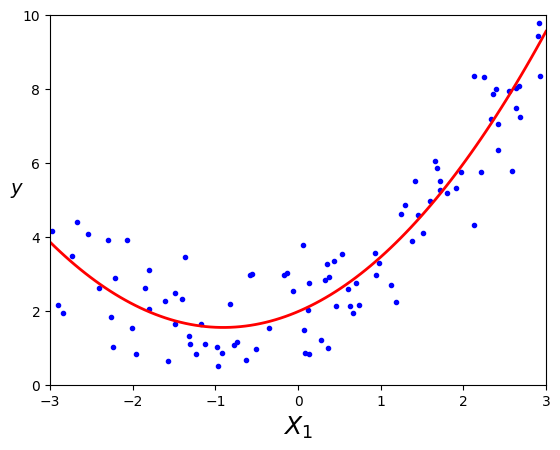

In [54]:
plt.plot(X,y,"b.")
plt.plot(X_new, y_new,"r-", linewidth=2, label="Predictions")
plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([-3,3,0,10])
plt.show()


In [ ]:
#poly regression for two features



In [56]:
m=100
X1=6*np.random.rand(m,1)-3
X2=2*np.random.rand(m,1)-4
z=0.5*X1**2+X1+2+X2**2+5*X2+np.random.randn(m,1)

In [62]:
import pandas as pd

X=pd.DataFrame(np.hstack((X1,X2)), columns=['X1','X2'])
#df_horizontal = pd.DataFrame(np.hstack((array1, array2)), columns=['A', 'B', 'C', 'D'])
X.head()

,X1,X2
0,2.561498,-3.058100
1,-1.717811,-3.015535
2,-0.479976,-3.609982
3,-2.941879,-2.695814
4,2.147731,-2.438161


In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
X_poly[0]

array([ 2.56149808, -3.05809988,  6.5612724 , -7.83331697,  9.35197489])

In [65]:
X[:1]

,X1,X2
0,2.561498,-3.0581


In [66]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,z)
lin_reg.intercept_, lin_reg.coef_

(array([2.13271781]),
 array([[ 0.41736297,  4.91106222,  0.50008765, -0.13952776,  0.94242679]]))

In [73]:
##How can you tell your model is overfitting or underfitting?

#1. cross valdiation
#2. learnin curve

m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

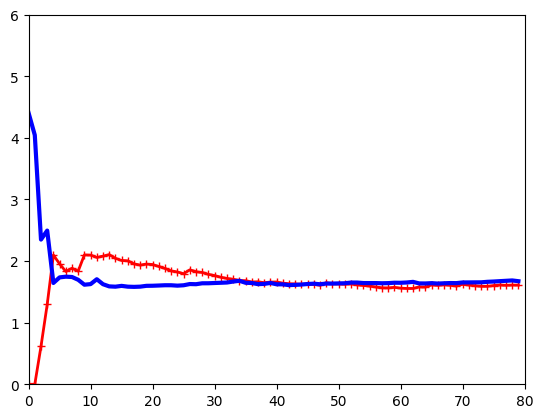

In [75]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X,y)
plt.axis([0, 80, 0, 6])
plt.show()

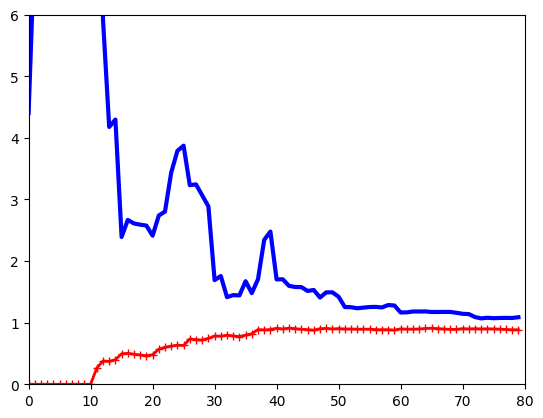

In [76]:
from sklearn.pipeline import Pipeline

polynomial_regression=Pipeline([
    ("poly_features",PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg",LinearRegression())
])

plot_learning_curves(polynomial_regression, X,y)
plt.axis([0,80,0,6])
plt.show()

In [ ]:
#To solve overfitting, should think about regularization.
#In polynomial, regularization is reduction of degree of polynomial.
#How about in linear?
#For linear, should constrain the weight (Ridge, Lasso and Elstic Net).

In [77]:
#Ridge regression with sklearn
#Ridge regression=linear regression+regularization


np.random.seed(42)
m=20
X=3*np.random.rand(m,1)
y=1+0.5*X+np.random.randn(m,1)/1.5



In [80]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[2]])

array([[1.73211649]])

In [81]:
ridge_reg=Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[2]])

array([[1.73215226]])

In [88]:
import scipy as sp

A=sp.sparse.identity(2).toarray()


In [89]:
#close form
a=1
X_b=np.c_[np.ones((20,1)),X]
theta_ne=np.linalg.inv(X_b.T.dot(X_b)+a*A).dot(X_b.T).dot(y)
theta_ne

array([[0.86791284],
       [0.43213597]])

In [90]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_ne)
y_predict

array([[0.86791284],
       [1.73218478]])

In [92]:
#Ridge regression=SGD regressor+L2 regularization

sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[2]])

array([1.77581228])

In [93]:
#Lasso regression
#Lasso reg=Linear reg+L-1 regularization
#automatically feature selection and output sparse model

from sklearn.linear_model import Lasso

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[2]])



array([1.66871781])

In [94]:
#Lasso regression=SGD regressor+L1 regularization

sgd_reg=SGDRegressor(penalty="l1")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[2]])

array([1.78050337])

In [ ]:
#Elastic is between Ridge and Lasso.
#if r=0, Elastic=Ridge
#if r=1, Elastic=Lasso

#Plain LR is not good.
#Ridge is good default. But it is only for few features.
#Elastic is the best when there are many feautures> no of inferences

In [95]:
from sklearn.linear_model import ElasticNet

elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[2]])

array([1.69564542])

In [96]:
#Classification of Iris datasets by using logistic regression
#Binary classification
#sigmoid function

from sklearn import datasets
iris=datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [98]:
iris["data"].shape

(150, 4)

In [99]:
X=iris["data"][:,3:]#only petal width
X[:5]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [106]:
y = (iris["target"] == 2).astype(np.int64)
y[:5]

array([0, 0, 0, 0, 0])

In [107]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [108]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

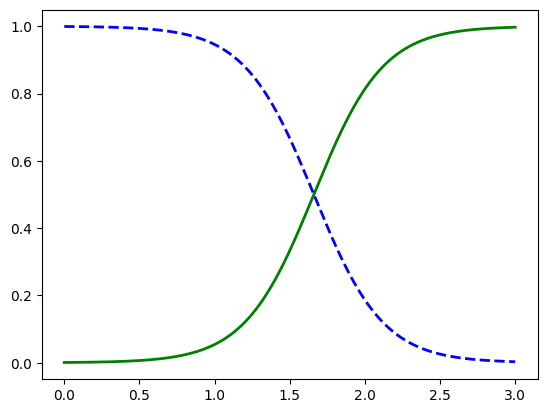

In [109]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [ ]:
#Classification of Iris datasets by using logistic regression
#multi classification
#softmax function
#softmax regression=multinomial logistic regression



In [110]:
X=iris["data"][:,(2,3)]#petal length, petal width
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [111]:
y=iris["target"]
y[:5]

array([0, 0, 0, 0, 0])

In [112]:
softmax_reg=LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

/home/cmatpcuser/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [113]:
softmax_reg.predict([[5,2]])

array([2])

In [114]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])